# DTSA 5011: Disaster Tweets

## Project Overview

For this project, I will be competing in the Disaster Tweets competitition from Kaggle (linked below). The primary goal for this project will be to create a deep learning model that can accurately determine if a string of text is a tweet related to a disaster or not. I plan to use and train a Keras Sequential model to predict tweets in a test dataset.

In [6]:
#Importing Libraries & Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Disaster Tweets Data Set

The training dataset that will be used in this competition was found from Kaggle, and it contains text from over 7,600 tweets alongside the keyword, and location if they exist. The last column in the .csv file includes a label (target) that classifies each tweet as related to a disaster (1), or not related to a disaster (0). Within the testing data, we are not provided the labels, and we will need to generate these ourselves.

The provided dataset was already cleaned for the competition. Therefore, I did not take any additional steps to clean the data, as this was unnecessary.

In [12]:
#Load in Train & Test Dataframes
train_df = pd.read_csv('/Users/jschlangen/Desktop/nlp-getting-started/train.csv')
test_df = pd.read_csv('/Users/jschlangen/Desktop/nlp-getting-started/test.csv')

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# Exploratory Data Analysis

Here...

In [13]:
#Describe Training Dataset
train_df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


(array([4342.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3271.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

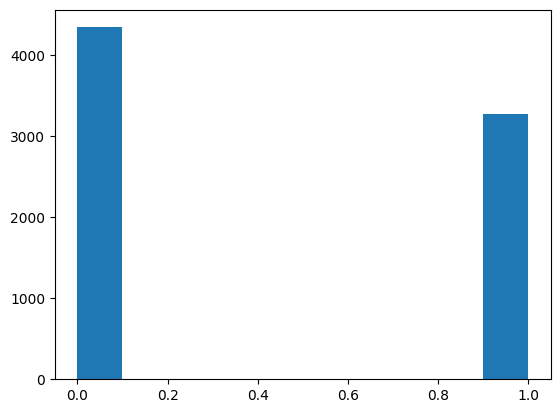

In [10]:
#Simple Histogram plot of Target values
plt.hist(train_df['target'])

# Model Architecture

Here...

In [6]:
#Processing Tweet text with Tokenizer
max_words = 9999
max_length = 99

token = Tokenizer(num_words=max_words)
token.fit_on_texts(train_df['text'])
train_sequences = token.texts_to_sequences(train_df['text'])
x_train = pad_sequences(train_sequences, maxlen=max_length)
y_train = train_df['target'].values

token = Tokenizer(num_words=max_words)
token.fit_on_texts(test_df['text'])
test_sequences = token.texts_to_sequences(test_df['text'])
x_test = pad_sequences(test_sequences, maxlen=max_length)

In [7]:
#Building Model using Keras Sequential
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128))
model.add(LSTM(64, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Results & Analysis

Here...

In [8]:
#Training Model & Generating Predictions
model.fit(x_train, y_train, epochs=5, batch_size=32)

y_pred = model.predict(x_test)
y_pred = (y_pred >= 0.5).astype(int)

Epoch 1/5
238/238 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.6499 - loss: 0.6038
Epoch 2/5
238/238 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.8706 - loss: 0.3261
Epoch 3/5
238/238 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9109 - loss: 0.2402
Epoch 4/5
238/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9350 - loss: 0.1790
Epoch 5/5
238/238 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9530 - loss: 0.1291
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [10]:
#Creating Export Dataframe for Submission
export_df = pd.DataFrame({'id': test_df['id'], 'target': y_pred.flatten()})

export_df.head(10)


,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
5,12,0
6,21,0
7,22,0
8,27,0
9,29,0


In [ ]:
#Exporting Dataframe to .csv Submission file
export_df.to_csv('Tweets_Test_Submission.csv', index=False)

# Conclusion

Here...